In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install kaggle

In [5]:
!pip install opendatasets

In [6]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/itskindastrange/garbage-classification-ecosort')

Dataset URL: https://www.kaggle.com/datasets/itskindastrange/garbage-classification-ecosort


100%|██████████| 239M/239M [00:02<00:00, 111MB/s]


In [7]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
# re-size all the images to this

IMAGE_SIZE = [224, 224]

train_path = '/content/garbage-classification-ecosort/garbage_classification/train'
valid_path = '/content/garbage-classification-ecosort/garbage_classification/test'

In [9]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE+ [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

In [12]:
# useful for getting number of output classes
folders = glob('/content/garbage-classification-ecosort/garbage_classification/train/*')

In [13]:
folders

['/content/garbage-classification-ecosort/garbage_classification/train/metal',
 '/content/garbage-classification-ecosort/garbage_classification/train/shoes',
 '/content/garbage-classification-ecosort/garbage_classification/train/clothes',
 '/content/garbage-classification-ecosort/garbage_classification/train/brown-glass',
 '/content/garbage-classification-ecosort/garbage_classification/train/plastic',
 '/content/garbage-classification-ecosort/garbage_classification/train/paper',
 '/content/garbage-classification-ecosort/garbage_classification/train/white-glass',
 '/content/garbage-classification-ecosort/garbage_classification/train/battery',
 '/content/garbage-classification-ecosort/garbage_classification/train/green-glass',
 '/content/garbage-classification-ecosort/garbage_classification/train/trash',
 '/content/garbage-classification-ecosort/garbage_classification/train/cardboard',
 '/content/garbage-classification-ecosort/garbage_classification/train/biological']

In [14]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [15]:
# out put layer
prediction = Dense(len(folders), activation='softmax')(x)

In [16]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [17]:
# here is the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,417,196 (85.51 MB)

 Trainable params: 614,412 (2.34 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [18]:
# tell the model what cost and optimization method to used
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enhanced data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,            # Random rotations between 0 to 30 degrees
    width_shift_range=0.2,        # Randomly shift the image horizontally (20% of the total width)
    height_shift_range=0.2,       # Randomly shift the image vertically (20% of the total height)
    brightness_range=[0.2, 1.0],  # Randomly adjust the brightness between 20% to 100%
    fill_mode='nearest'           # Filling missing pixels during transformations
)

# Rescaling for the test set (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)


In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/garbage-classification-ecosort/garbage_classification/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 12413 images belonging to 12 classes.


In [20]:
# Make sure you provide the same target size as initialied for the image size
test_set = train_datagen.flow_from_directory('/content/garbage-classification-ecosort/garbage_classification/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 3102 images belonging to 12 classes.


In [22]:
# fit the model
#Run the cell. It will take some time to execute

r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


388/388 ━━━━━━━━━━━━━━━━━━━━ 249s 592ms/step - accuracy: 0.7087 - loss: 4.3434 - val_accuracy: 0.8059 - val_loss: 3.0272
Epoch 2/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


388/388 ━━━━━━━━━━━━━━━━━━━━ 233s 540ms/step - accuracy: 0.8322 - loss: 2.7160 - val_accuracy: 0.8182 - val_loss: 3.7234
Epoch 4/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 271s 567ms/step - accuracy: 0.8520 - loss: 2.8504 - val_accuracy: 0.8411 - val_loss: 3.6411
Epoch 6/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 221s 564ms/step - accuracy: 0.8728 - loss: 2.7544 - val_accuracy: 0.8417 - val_loss: 3.5855
Epoch 8/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 218s 555ms/step - accuracy: 0.8725 - loss: 2.8088 - val_accuracy: 0.8072 - val_loss: 4.8869
Epoch 10/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/25
388/388 ━━━━━━━━━━━━━━━━━━━━ 219s 559ms/step - accuracy: 0.8834 - loss: 2.6732 - val_accur

In [23]:
import matplotlib.pyplot as plt

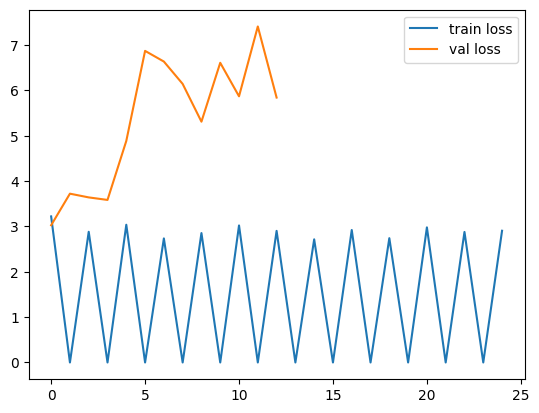

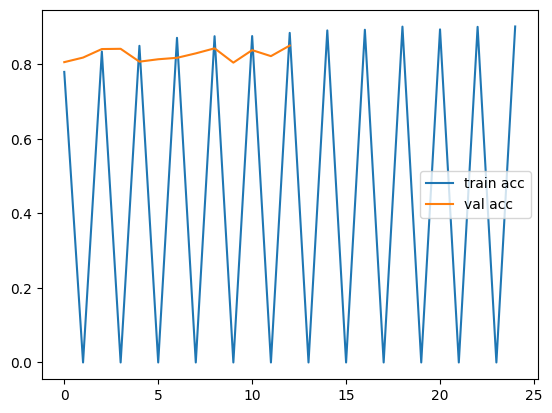

<Figure size 640x480 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Assuming `model` is your trained model
# and it outputs class probabilities for multi-class classification

def waste_classification(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming the model was trained on 224x224 images
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Normalize the image (if required)
    img_array = img_array / 255.0  # Normalize if the model expects input between 0 and 1

    # Make predictions
    predictions = model.predict(img_array)

    # Get predicted class (index of the highest probability)
    predicted_class = np.argmax(predictions, axis=-1)[0]

    # Map the predicted class index to plant disease type
    class_labels=[
    'Battery',
    'Biological',
    'Brown Glass',
    'Carboard',
    'Clothes',
    'Green Glass',
    'Metal',
    'Paper',
    'Plastic',
    'Shoes',
    'Trash',
    'White Glass',
]

    # Get the plant disease type based on predicted class
    plant_disease_type = class_labels[predicted_class]

    print(f"Predicted Plant Disease Type: {plant_disease_type}")

    # Display the image with the predicted class label
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Plant Disease Type: {plant_disease_type}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Plant Disease Type: Battery


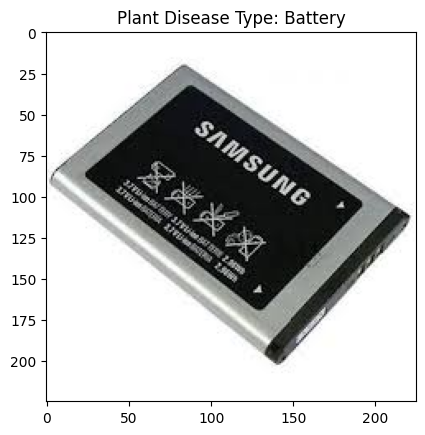

In [31]:
waste_classification('/content/download.jpg')

In [32]:
import tensorflow as tf

# Save the trained model first. This will create the 'model.h5' file in the current directory.
model.save('model.h5')


# Now, you can load the model.
loaded_model = tf.keras.models.load_model('model.h5')

In [33]:
import tensorflow as tf

# Save the trained model first. This will create the 'model.h5' file in the current directory.
model.save('my_model.keras')


# Now, you can load the model.
loaded_model = tf.keras.models.load_model('my_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [34]:
from google.colab import files

# Download .keras model
files.download('my_model.keras')

# Download .h5 model (if saved as .h5)
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>